In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Week 1 - EDA and data preprocessing

### Aggregating df_new so that each column has a 0.25s interval

### Combining Accelerometer and Gyroscope df_newsets Horizontally and then Vertically

### Converting datetime format to hours minutes and seconds

In [78]:
# read csv file named dataset.csv
df = pd.read_csv('dataset.csv')

In [79]:
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Genre,BPM
0,00:00:00.000000,-1.563384,3.703485,8.927862,-0.269163,-0.215996,0.037011,rock,173
1,00:00:00.250000,-0.832034,2.618059,9.157848,-0.275456,0.300962,-0.007585,rock,173
2,00:00:00.500000,-1.978007,2.809231,9.223699,-0.055587,-0.296234,-0.348594,rock,173
3,00:00:00.750000,-1.394112,1.944860,9.228296,0.187295,-0.638973,-0.304613,rock,173
4,00:00:01.000000,1.404846,2.322332,9.494185,0.267072,-1.329970,0.142612,rock,173
...,...,...,...,...,...,...,...,...,...
18624,00:14:00.250000,1.402597,4.288324,8.840542,0.099436,0.289380,0.141558,lofi,79
18625,00:14:00.500000,0.938983,4.361283,8.856370,0.072526,0.093060,0.003982,lofi,79
18626,00:14:00.750000,0.639292,4.480020,8.736529,0.043741,0.137521,-0.010292,lofi,79
18627,00:14:01.000000,0.653660,4.503643,8.486324,-0.072902,0.008056,-0.034407,lofi,79


In [80]:
df.shape

(18629, 9)

In [81]:
df.isnull().sum()

Time (s)                  0
Acceleration x (m/s^2)    0
Acceleration y (m/s^2)    0
Acceleration z (m/s^2)    0
Gyroscope x (rad/s)       0
Gyroscope y (rad/s)       0
Gyroscope z (rad/s)       0
Genre                     0
BPM                       0
dtype: int64

In [82]:
# check df_new types
df.dtypes

Time (s)                   object
Acceleration x (m/s^2)    float64
Acceleration y (m/s^2)    float64
Acceleration z (m/s^2)    float64
Gyroscope x (rad/s)       float64
Gyroscope y (rad/s)       float64
Gyroscope z (rad/s)       float64
Genre                      object
BPM                         int64
dtype: object

In [83]:
df.describe(include='object')

,Time (s),Genre
count,18629,18629
unique,4252,5
top,00:00:00.000000,jazz
freq,5,4252


In [84]:
df.describe()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),BPM
count,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000
mean,3.800800,1.858437,3.779061,0.012354,0.010672,0.042730,115.971550
std,5.710247,6.266716,5.513403,1.755464,1.491357,1.769321,31.594765
min,-21.573309,-35.354150,-23.271866,-12.112553,-12.139550,-10.480836,62.000000
25%,0.200358,-1.405110,0.531667,-0.698815,-0.587539,-0.707002,94.000000
50%,3.726487,2.943523,3.755729,0.002162,0.008327,0.021920,119.000000
75%,7.587721,6.482743,7.661830,0.718192,0.651966,0.790541,128.000000
max,32.077082,22.583202,35.132009,11.186672,8.256840,9.795403,186.000000


In [85]:
df['Acceleration Net'] = (df['Acceleration x (m/s^2)']**2 + df['Acceleration y (m/s^2)']**2 + df['Acceleration z (m/s^2)']**2)**0.5
df['Gyro Net'] = (df['Gyroscope x (rad/s)']**2 + df['Gyroscope y (rad/s)']**2 + df['Gyroscope z (rad/s)']**2)**0.5

Text(0.5, 1.0, 'Net acceleration over time for each genre')

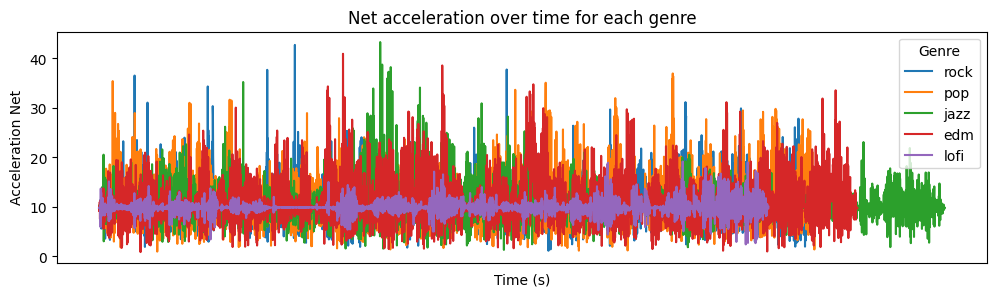

In [86]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=df['Time (s)'], y=df['Acceleration Net'], hue=df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net acceleration over time for each genre')

Text(0.5, 1.0, 'Net angular velocity over time for each genre')

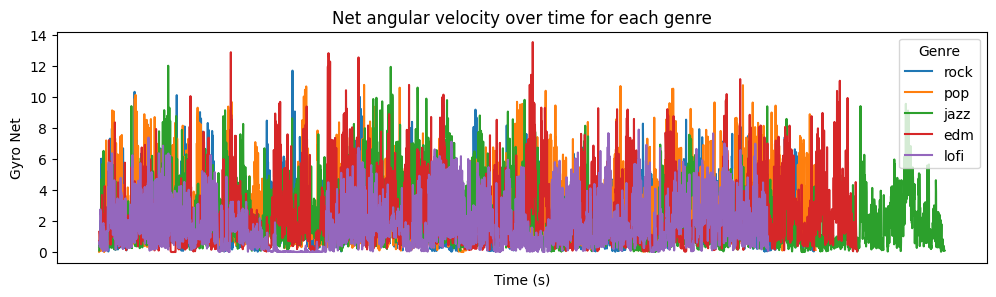

In [87]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=df['Time (s)'], y=df['Gyro Net'], hue=df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net angular velocity over time for each genre')

In [88]:
df.columns

Index(['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)',
       'Gyroscope z (rad/s)', 'Genre', 'BPM', 'Acceleration Net', 'Gyro Net'],
      dtype='object')

In [89]:
# describe df with rounded 2 decimals
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Acceleration x (m/s^2),18629.0,3.80,5.71,-21.57,0.20,3.73,7.59,32.08
Acceleration y (m/s^2),18629.0,1.86,6.27,-35.35,-1.41,2.94,6.48,22.58
Acceleration z (m/s^2),18629.0,3.78,5.51,-23.27,0.53,3.76,7.66,35.13
Gyroscope x (rad/s),18629.0,0.01,1.76,-12.11,-0.70,0.00,0.72,11.19
Gyroscope y (rad/s),18629.0,0.01,1.49,-12.14,-0.59,0.01,0.65,8.26
Gyroscope z (rad/s),18629.0,0.04,1.77,-10.48,-0.71,0.02,0.79,9.80
BPM,18629.0,115.97,31.59,62.00,94.00,119.00,128.00,186.00
Acceleration Net,18629.0,10.87,4.03,0.86,8.82,9.99,12.27,43.31
Gyro Net,18629.0,2.23,1.86,0.00,0.85,1.72,3.13,13.52


Text(0.5, 1.0, 'Mean angular velocity for each genre')

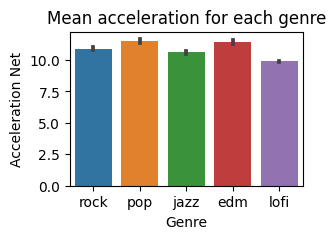

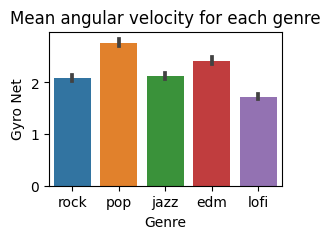

In [90]:
plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df['Acceleration Net'])
plt.title('Mean acceleration for each genre')

plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df['Gyro Net'])
plt.title('Mean angular velocity for each genre')


Text(0.5, 1.0, 'Mean BPM for each genre')

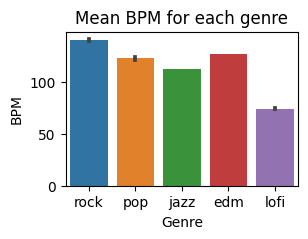

In [91]:
# mean BPM for each genre

plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df["BPM"])
plt.title('Mean BPM for each genre')



/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_39411/600454762.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftest.drop('BPM', axis=1).corr(), annot=False, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation between numerical features heatmap except BPM')

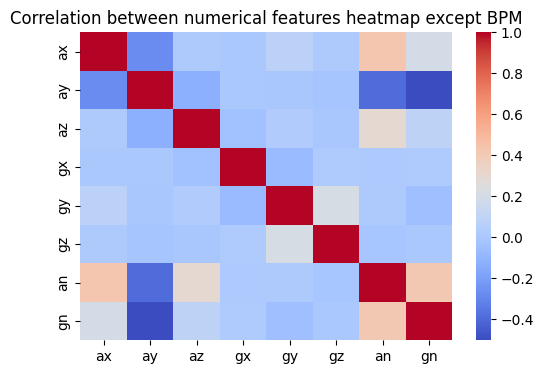

In [92]:
# correlation between numerical features heatmap except BPM
# replace  the label with ax for acceleration x, ay for acceleration y, az for acceleration z, gx for gyroscope x, gy for gyroscope y, gz for gyroscope z, an for acceleration net, gn for gyroscope net

dftest = df.copy()
dftest.columns = ['Time (s)', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'Genre', 'BPM', 'an', 'gn']

plt.figure(figsize=(6, 4))
sns.heatmap(dftest.drop('BPM', axis=1).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation between numerical features heatmap except BPM')


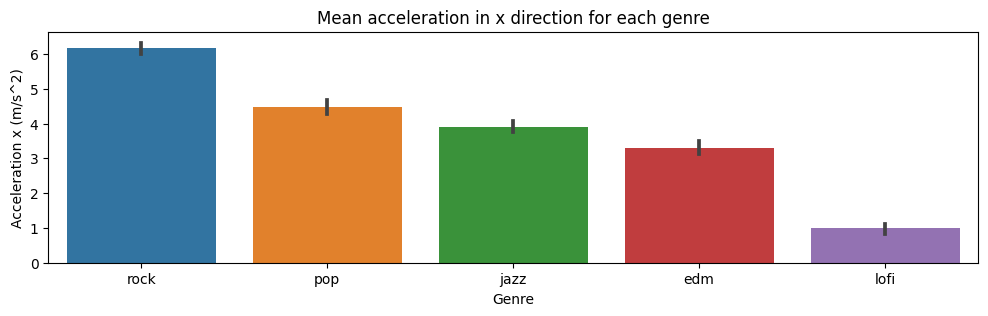

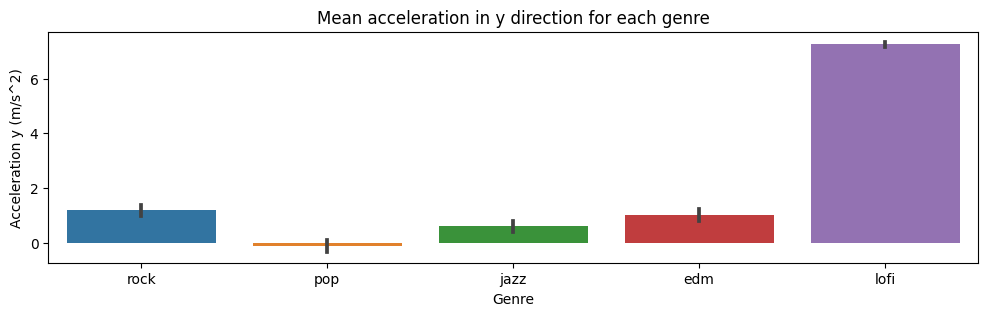

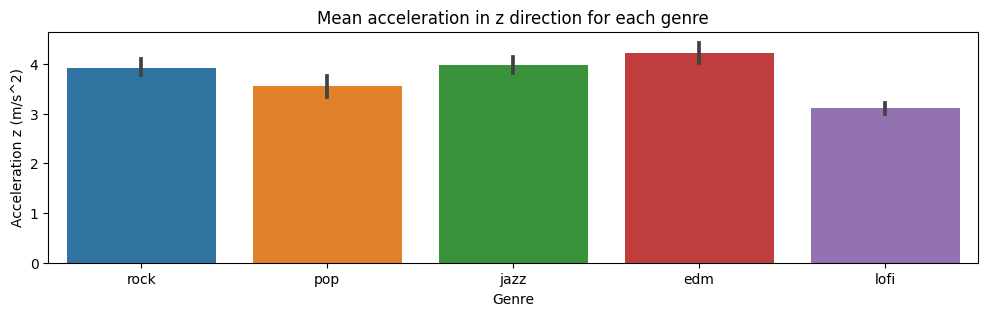

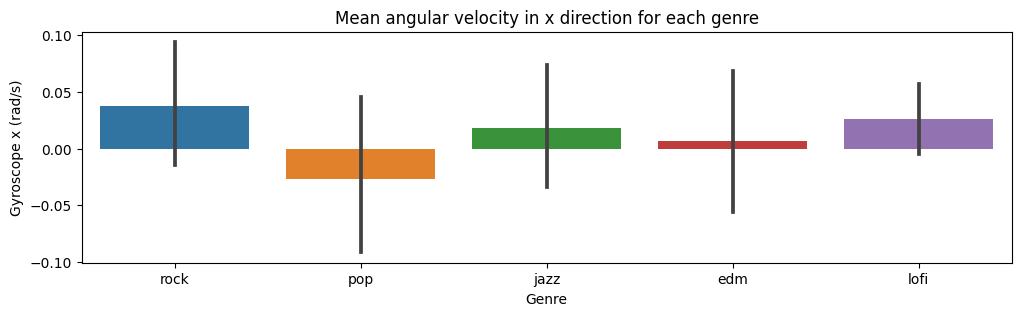

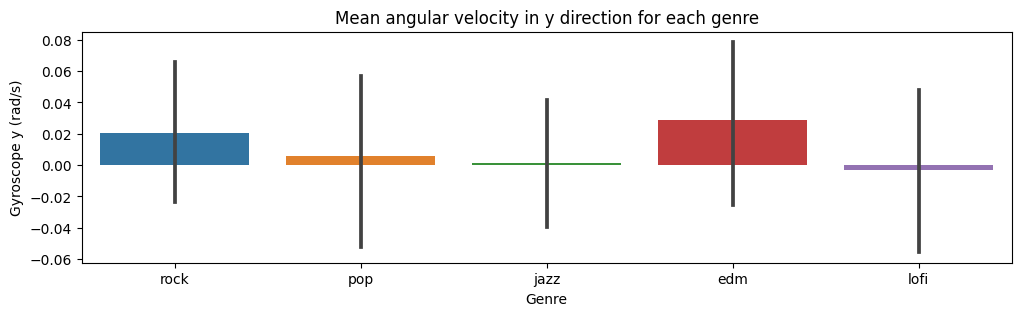

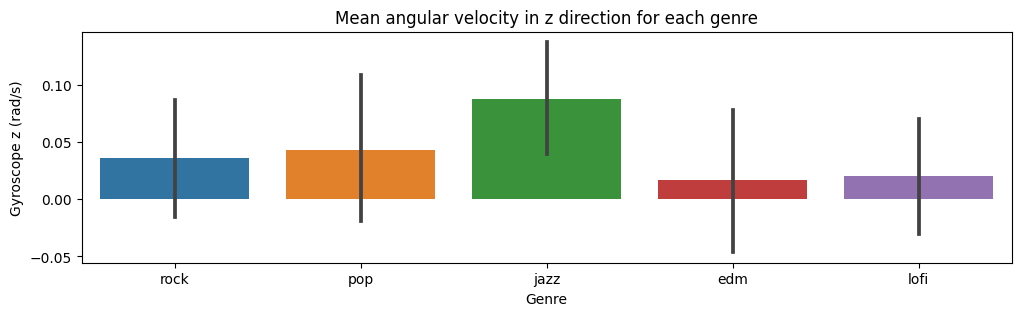

In [93]:
# mean of each genre for each feature plot

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration x (m/s^2)'])
plt.title('Mean acceleration in x direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration y (m/s^2)'])
plt.title('Mean acceleration in y direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration z (m/s^2)'])
plt.title('Mean acceleration in z direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope x (rad/s)'])
plt.title('Mean angular velocity in x direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope y (rad/s)'])
plt.title('Mean angular velocity in y direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope z (rad/s)'])
plt.title('Mean angular velocity in z direction for each genre')

plt.show()



### Kalman Filter

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18629 entries, 0 to 18628
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (s)                18629 non-null  object 
 1   Acceleration x (m/s^2)  18629 non-null  float64
 2   Acceleration y (m/s^2)  18629 non-null  float64
 3   Acceleration z (m/s^2)  18629 non-null  float64
 4   Gyroscope x (rad/s)     18629 non-null  float64
 5   Gyroscope y (rad/s)     18629 non-null  float64
 6   Gyroscope z (rad/s)     18629 non-null  float64
 7   Genre                   18629 non-null  object 
 8   BPM                     18629 non-null  int64  
 9   Acceleration Net        18629 non-null  float64
 10  Gyro Net                18629 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.6+ MB


In [95]:
df_new_ = df[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)',
           'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']]

In [96]:
df_new_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18629 entries, 0 to 18628
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Acceleration x (m/s^2)  18629 non-null  float64
 1   Acceleration y (m/s^2)  18629 non-null  float64
 2   Acceleration z (m/s^2)  18629 non-null  float64
 3   Gyroscope x (rad/s)     18629 non-null  float64
 4   Gyroscope y (rad/s)     18629 non-null  float64
 5   Gyroscope z (rad/s)     18629 non-null  float64
dtypes: float64(6)
memory usage: 873.4 KB


In [97]:
df_new = df[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)',
           'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values
df_new

array([[-1.56338449e+00,  3.70348474e+00,  8.92786187e+00,
        -2.69162698e-01, -2.15996241e-01,  3.70114951e-02],
       [-8.32033698e-01,  2.61805881e+00,  9.15784832e+00,
        -2.75456182e-01,  3.00962047e-01, -7.58468652e-03],
       [-1.97800728e+00,  2.80923130e+00,  9.22369860e+00,
        -5.55871008e-02, -2.96234488e-01, -3.48594084e-01],
       ...,
       [ 6.39292038e-01,  4.48001970e+00,  8.73652908e+00,
         4.37414541e-02,  1.37521481e-01, -1.02915783e-02],
       [ 6.53660473e-01,  4.50364307e+00,  8.48632380e+00,
        -7.29022713e-02,  8.05554795e-03, -3.44071466e-02],
       [ 2.81669406e-01,  4.58338775e+00,  8.91593483e+00,
        -4.93041024e-02, -3.00711381e-01, -1.74200548e-01]])

In [98]:
# apply kalman filter outlier detection and replace the outliers with the mean of the column on df_new

import pykalman
from pykalman import KalmanFilter
import numpy as np

# Define Kalman filter model parameters
transition_matrix = np.eye(6)
observation_matrix = np.eye(6)
initial_state_mean = df_new[0]
initial_state_covariance = np.eye(6)
observation_covariance = np.eye(6)
transition_covariance = np.eye(6) * 0.01

# Create Kalman filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance
)

# Apply Kalman filter to the df_new
filtered_state_means, filtered_state_covariances = kf.filter(df_new)

# Calculate residuals
residuals = df_new - filtered_state_means

# Set threshold for outlier detection
threshold = 2.5  # Adjust according to your df_new and requirements

# Detect outliers
outliers = np.abs(residuals) > threshold

# Replace outliers with filtered values
replaced_df_new = np.where(outliers, filtered_state_means, df_new)

# Create a new df_newFrame with replaced values
replaced_df = pd.DataFrame(replaced_df_new, columns=df_new_.columns)

# Print the original df_newFrame, outliers, and replaced df_newFrame
print("Original df_newFrame:")
print(df_new_)
print("\nOutliers:")
print(outliers)
print("\nReplaced df_newFrame:")
print(replaced_df)





Original df_newFrame:
       Acceleration x (m/s^2)  Acceleration y (m/s^2)  Acceleration z (m/s^2)  \
0                   -1.563384                3.703485                8.927862   
1                   -0.832034                2.618059                9.157848   
2                   -1.978007                2.809231                9.223699   
3                   -1.394112                1.944860                9.228296   
4                    1.404846                2.322332                9.494185   
...                       ...                     ...                     ...   
18624                1.402597                4.288324                8.840542   
18625                0.938983                4.361283                8.856370   
18626                0.639292                4.480020                8.736529   
18627                0.653660                4.503643                8.486324   
18628                0.281669                4.583388                8.915935   

     

In [99]:
replaced_df['Acceleration Net'] = (replaced_df['Acceleration x (m/s^2)']**2 + replaced_df['Acceleration y (m/s^2)']**2 + replaced_df['Acceleration z (m/s^2)']**2)**0.5
replaced_df['Gyro Net'] = (replaced_df['Gyroscope x (rad/s)']**2 + replaced_df['Gyroscope y (rad/s)']**2 + replaced_df['Gyroscope z (rad/s)']**2)**0.5
replaced_df['Time (s)'] = df['Time (s)']

In [100]:
replaced_df['Genre'] = df['Genre']
replaced_df['BPM'] = df['BPM']

Text(0.5, 1.0, 'Net acceleration after outlier replacement')

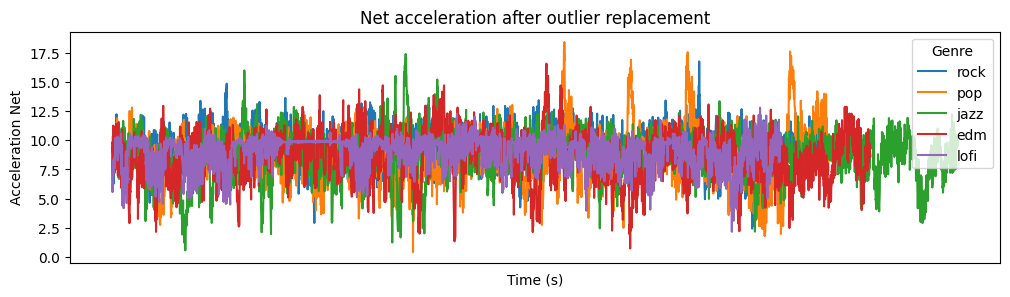

In [101]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=replaced_df['Time (s)'], y=replaced_df['Acceleration Net'], hue=replaced_df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net acceleration after outlier replacement')

In [102]:
# no of true in the list of outliers
outliers.sum()


30010

Text(0.5, 1.0, 'Net angular velocity after outlier replacement')

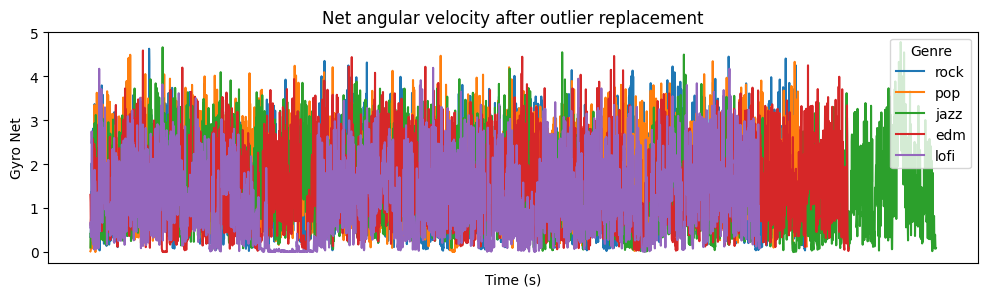

In [103]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=replaced_df['Time (s)'], y=replaced_df['Gyro Net'], hue=replaced_df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net angular velocity after outlier replacement')

In [104]:
#export replaced_df to csv file named replaced_dataset.csv
replaced_df.to_csv('replaced_dataset.csv', index=False)

# Week 2 - Feature engineering and Model Selection

In [6]:
# read replaced_dataset.csv
replaced_df = pd.read_csv('replaced_dataset.csv')

In [7]:
replaced_df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Acceleration Net,Gyro Net,Time (s),Genre,BPM
0,-1.563384,3.703485,8.927862,-0.269163,-0.215996,0.037011,9.791154,0.347092,00:00:00.000000,rock,173
1,-0.832034,2.618059,9.157848,-0.275456,0.300962,-0.007585,9.560999,0.408059,00:00:00.250000,rock,173
2,-1.978007,2.809231,9.223699,-0.055587,-0.296234,-0.348594,9.842810,0.460828,00:00:00.500000,rock,173
3,-1.394112,1.944860,9.228296,0.187295,-0.638973,-0.304613,9.533492,0.732226,00:00:00.750000,rock,173
4,1.404846,2.322332,9.494185,0.267072,-1.329970,0.142612,9.874531,1.363996,00:00:01.000000,rock,173


Text(0.5, 1.0, 'Net angular velocity after outlier replacement')

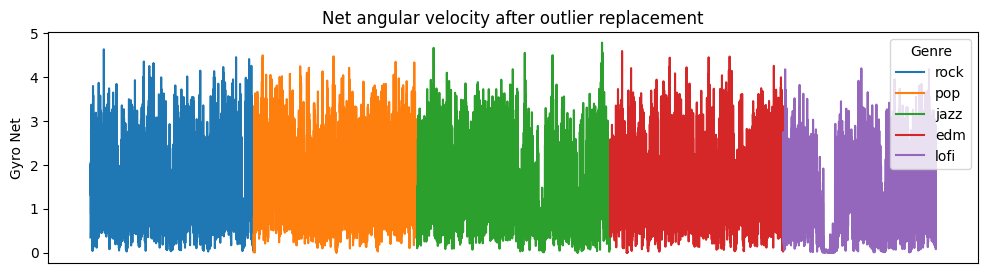

In [8]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=range(df.shape[0]), y=replaced_df['Gyro Net'], hue=replaced_df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net angular velocity after outlier replacement')

Text(0.5, 1.0, 'Net acceleration after outlier replacement')

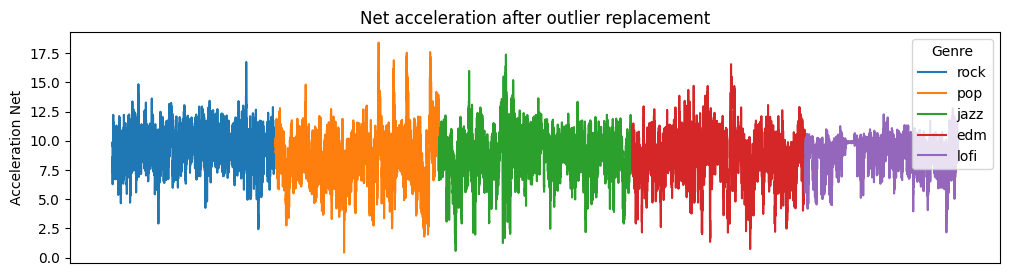

In [9]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=range(df.shape[0]), y=replaced_df['Acceleration Net'], hue=replaced_df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net acceleration after outlier replacement')

In [10]:
replaced_df.columns

Index(['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)',
       'Gyroscope z (rad/s)', 'Acceleration Net', 'Gyro Net', 'Time (s)',
       'Genre', 'BPM'],
      dtype='object')

In [11]:
df_mini = df.drop(['Time (s)', 'Genre', 'BPM'], axis=1)

from chapter4_1 import FourierTransformation

ft = FourierTransformation()

df_mega = ft.abstract_frequency(df_mini, df_mini.columns, window_size = 50, sampling_rate = 20)

/Users/harshpundhir/Documents/ML4QS/chapter4_1.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_table[collist] = pd.DataFrame(frequencies, index=data_table.index)
/Users/harshpundhir/Documents/ML4QS/chapter4_1.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_table[collist] = pd.DataFrame(frequencies, index=data_table.index)
/Users/harshpundhir/Documents/ML4QS/chapter4_1.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [12]:
#percentage empty values in temp
(df_mega.isnull().sum()/df_mega.shape[0])*100

Acceleration x (m/s^2)         0.000000
Acceleration y (m/s^2)         0.000000
Acceleration z (m/s^2)         0.000000
Gyroscope x (rad/s)            0.000000
Gyroscope y (rad/s)            0.000000
                                 ...   
Gyro Net_freq_8.4_Hz_ws_50     0.268399
Gyro Net_freq_8.8_Hz_ws_50     0.268399
Gyro Net_freq_9.2_Hz_ws_50     0.268399
Gyro Net_freq_9.6_Hz_ws_50     0.268399
Gyro Net_freq_10.0_Hz_ws_50    0.268399
Length: 240, dtype: float64

In [13]:
len(df_mega.columns)

240

In [14]:
# KNN imputation for columns in temp with any null values

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=19)

df_mega = pd.DataFrame(imputer.fit_transform(df_mega), columns=df_mega.columns)

#percentage empty values in temp
print((df_mega.isnull().sum()/df_mega.shape[0])*100)





Acceleration x (m/s^2)         0.0
Acceleration y (m/s^2)         0.0
Acceleration z (m/s^2)         0.0
Gyroscope x (rad/s)            0.0
Gyroscope y (rad/s)            0.0
                              ... 
Gyro Net_freq_8.4_Hz_ws_50     0.0
Gyro Net_freq_8.8_Hz_ws_50     0.0
Gyro Net_freq_9.2_Hz_ws_50     0.0
Gyro Net_freq_9.6_Hz_ws_50     0.0
Gyro Net_freq_10.0_Hz_ws_50    0.0
Length: 240, dtype: float64


In [93]:
# export df_mega to csv file named df_mega.csv

df_mega.to_csv('all_featured_dataset.csv', index=False)

In [15]:
# decision tree feature importance for df_mega

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = df_mega
y = df['BPM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

print(dt.feature_importances_)

# pick the features that explain 95% of the variance in df_mega through decision tree feature importancenfrom above dt.feature_importances_






DecisionTreeRegressor(random_state=42)

Text(0, 0.5, 'Feature importance')

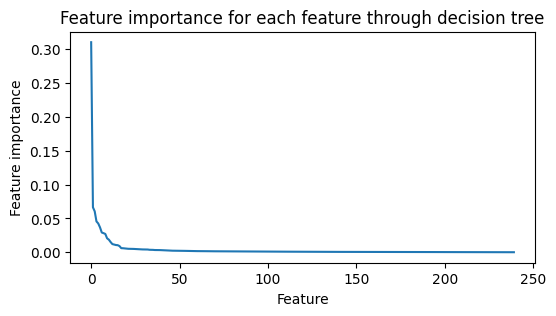

In [19]:
# dictionary of top 50 features with key as column name and value as feature importance
dict_ = dict(zip(df_mega.columns, dt.feature_importances_))

# sort the dictionary in descending order of feature importance
dict_ = dict(sorted(dict_.items(), key=lambda item: item[1], reverse=True))

# top 50 features
top_50_features,top_50_scores = list(dict_.keys())[:50], list(dict_.values())[:50]

# line plot of dict_ key vs dict_ value
plt.figure(figsize=(6, 3))
sns.lineplot(x=range(len(list(dict_.keys()))), y=list(dict_.values()))
# plt.xticks([])
# plt.gca().set_xticklabels([])
plt.title('Feature importance for each feature through decision tree')
plt.xlabel('Feature')
plt.ylabel('Feature importance')

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_44088/438375566.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([textwrap.fill(t, 10) for t in top_50_features[:10]])


[Text(0, 0, 'Accelerati\non y (m/s^\n2)_freq_0.\n0_Hz_ws_50'),
 Text(1, 0, 'Accelerati\non x (m/s^\n2)_freq_0.\n0_Hz_ws_50'),
 Text(2, 0, 'Accelerati\non Net_fre\nq_0.0_Hz_w\ns_50'),
 Text(3, 0, 'Accelerati\non y (m/s^\n2)_max_fre\nq'),
 Text(4, 0, 'Gyro Net_f\nreq_0.0_Hz\n_ws_50'),
 Text(5, 0, 'Gyroscope\nz (rad/s)_\nfreq_0.0_H\nz_ws_50'),
 Text(6, 0, 'Accelerati\non z (m/s^\n2)_freq_0.\n0_Hz_ws_50'),
 Text(7, 0, 'Gyroscope\nx (rad/s)_\nfreq_0.0_H\nz_ws_50'),
 Text(8, 0, 'Gyroscope\ny (rad/s)_\nfreq_0.0_H\nz_ws_50'),
 Text(9, 0, 'Accelerati\non z\n(m/s^2)')]

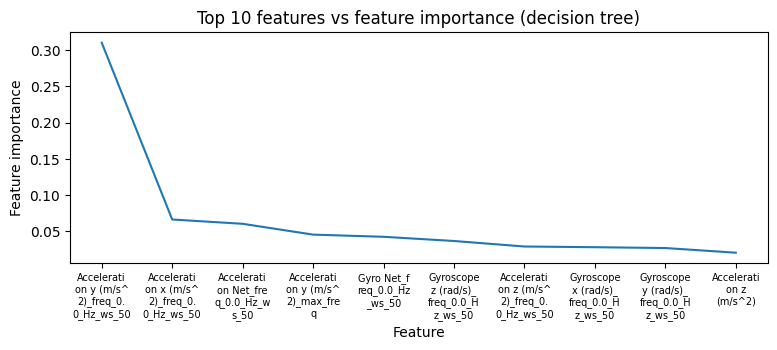

In [32]:
import textwrap
# line plot of top 50 features vs top 50 scores

plt.figure(figsize=(9, 3))

sns.lineplot(x=top_50_features[:10], y=top_50_scores[:10])
#plt.xticks(rotation=90)

# x tick mark text size decrease
plt.xticks(fontsize=7)
plt.title('Top 10 features vs feature importance (decision tree)')
plt.xlabel('Feature')
plt.ylabel('Feature importance')
# wrap the text x tick mark in 2 lines
plt.gca().set_xticklabels([textwrap.fill(t, 10) for t in top_50_features[:10]])




In [52]:
# PCA for df_mega

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_mega)

In [53]:
pca.explained_variance_ratio_

array([0.97759263, 0.01429144])

In [60]:
# shape of pca.components_
pca.components_[1].shape


(240,)

Text(0, 0.5, 'PCA component')

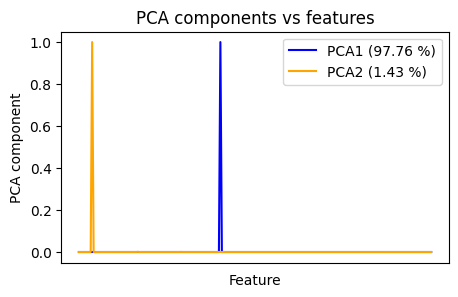

In [68]:
# plot of pca.components_ vs df_mega.columns for both pca1 and pca2 in same plot

plt.figure(figsize=(5, 3))
plt.plot(df_mega.columns, pca.components_[0], label='PCA1 (97.76 %)', linestyle='-', color='blue')
plt.plot(df_mega.columns, pca.components_[1], label='PCA2 (1.43 %)', linestyle='-', color='orange')
plt.xticks(rotation=90)
plt.xticks([])
plt.gca().set_xticklabels([])
plt.legend()
plt.title('PCA components vs features')
plt.xlabel('Feature')
plt.ylabel('PCA component')



In [88]:
pca_df = pd.DataFrame(pca.components_, columns=df_mega.columns)

In [89]:
pca_df

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Acceleration Net,Gyro Net,Acceleration x (m/s^2)_max_freq,Acceleration x (m/s^2)_freq_weighted,...,Gyro Net_freq_6.4_Hz_ws_50,Gyro Net_freq_6.8_Hz_ws_50,Gyro Net_freq_7.2_Hz_ws_50,Gyro Net_freq_7.6_Hz_ws_50,Gyro Net_freq_8.0_Hz_ws_50,Gyro Net_freq_8.4_Hz_ws_50,Gyro Net_freq_8.8_Hz_ws_50,Gyro Net_freq_9.2_Hz_ws_50,Gyro Net_freq_9.6_Hz_ws_50,Gyro Net_freq_10.0_Hz_ws_50
0,-5.491258e-07,0.000001,0.000002,-7.553773e-07,-6.283920e-07,-2.080651e-07,4.447587e-07,3.812412e-07,5.044533e-08,-0.000006,...,-4.757285e-07,-0.000001,-4.947825e-07,-4.679448e-07,-4.090229e-07,-4.367411e-07,6.692660e-07,-7.590742e-07,-2.472719e-07,-5.647433e-07
1,-9.900248e-06,0.000004,0.000012,-2.234937e-06,5.825103e-08,9.332786e-07,-2.156808e-06,-2.455565e-06,3.209842e-07,1.000000,...,1.547808e-06,0.000008,1.590518e-05,6.894827e-06,-2.148217e-06,-1.646842e-05,7.968338e-06,1.258988e-05,2.198048e-05,1.471924e-06


In [92]:
# name of column that has max value in pca_df in row 1 and row 2 with value
pca_df.iloc[0].idxmax(), pca_df.iloc[0].max(), pca_df.iloc[1].idxmax(), pca_df.iloc[1].max()





('Gyroscope x (rad/s)_freq_weighted',
 0.9999999905389884,
 'Acceleration x (m/s^2)_freq_weighted',
 0.9999995207050612)